<a href="https://colab.research.google.com/github/Gerosh-George/DSC-2021-ML-Projects/blob/main/Various_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sb
import numpy as np
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [2]:
print(sb.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
#loading the dataset file that was created while analysing titanic dataset 
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/Titanic_Clean.csv')
data.head()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,1,38.0,1,0,71.2833,0,0,0
2,2,1,3,26.0,0,0,7.9250,0,0,1
3,3,1,1,35.0,1,0,53.1000,0,0,1
4,4,0,3,35.0,0,0,8.0500,1,0,1


In [4]:
X=data.drop(["Unnamed: 0","survived"],axis=1)
Y=pd.DataFrame(data["survived"].copy())

In [5]:
X.head()

,pclass,age,sibsp,parch,fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [6]:
Y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [7]:
Train_X,Test_X,Train_Y,Test_Y= train_test_split(X,Y,test_size=0.33,random_state=40)
Train_Y=np.ravel(Train_Y,order='C')
print(type(Train_X))
print(type(Train_Y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [8]:
classifier_names=["Logistic Regression","KNN","Random Forest","Naive Bayes","Decision Tree","SVM"]
classifiers=[LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),GaussianNB(),DecisionTreeClassifier(),SVC()]
classifier_dict=zip(classifier_names,classifiers)

Pipeline concept to streamline different ML model comparison

In [9]:
def set_classifiers(classifiers,train_X,train_Y,test_X,test_Y):
  result=[]
  for name,c in classifiers:
    pipeline_state=Pipeline([
                              ('standardize',StandardScaler()),
                              ('classifier',c)
                              ])
    print("Running Classifier name: ",name);
    clf_acc=fit_classifier(pipeline_state,train_X,train_Y,test_X,test_Y)
    result.append(clf_acc)
  return result

In [10]:
def fit_classifier(pipeline,train_X,train_Y,test_X,test_Y):
  model=pipeline.fit(train_X,train_Y)
  y_pred=model.predict(test_X)
  accuracy=accuracy_score(test_Y,y_pred)
  print("accuracy score: {0:.2f}%".format(accuracy*100))
  return accuracy

In [11]:
results=set_classifiers(classifier_dict,Train_X,Train_Y,Test_X,Test_Y)

Running Classifier name:  Logistic Regression
accuracy score: 80.68%
Running Classifier name:  KNN
accuracy score: 80.68%
Running Classifier name:  Random Forest
accuracy score: 80.00%
Running Classifier name:  Naive Bayes
accuracy score: 80.34%
Running Classifier name:  Decision Tree
accuracy score: 76.61%
Running Classifier name:  SVM
accuracy score: 83.73%


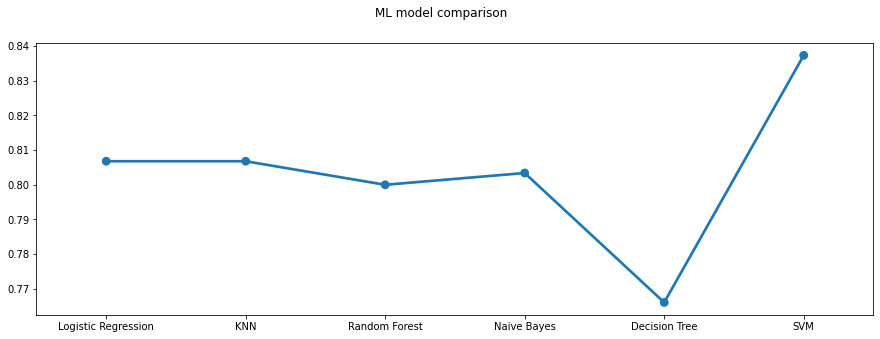

In [12]:
plt.figure(figsize=(15,5))
plt.suptitle("ML model comparison")
sb.pointplot(x=classifier_names,y=results)